# B-Mode, Lesion Detection, and Other Classification Method Samples

In [1]:
from modules.artifacts import *

## is_scan_valid()

Identifies a black (invalid) image, returning 0 for an invalid and 1 for valid. The following shows an example of a valid scan: 

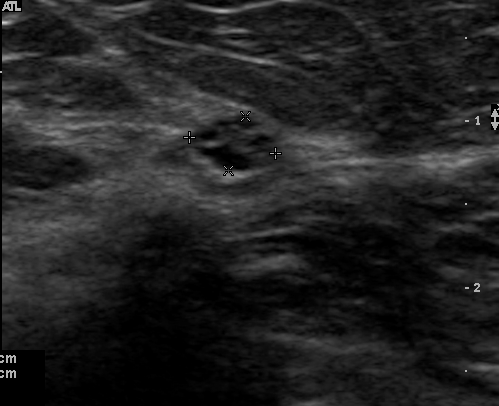

result:  1


In [2]:
img = Image.open('sample_data/image_4.png').convert("RGB")
display(img)
print("result: ", is_scan_valid(img))

## is_scan_grayscale()

Used as a helper function in this module. Identifies a grayscale image, returning True for a grayscale and 1 otherwise. The following shows examples of both grayscale and non-grayscale images: 

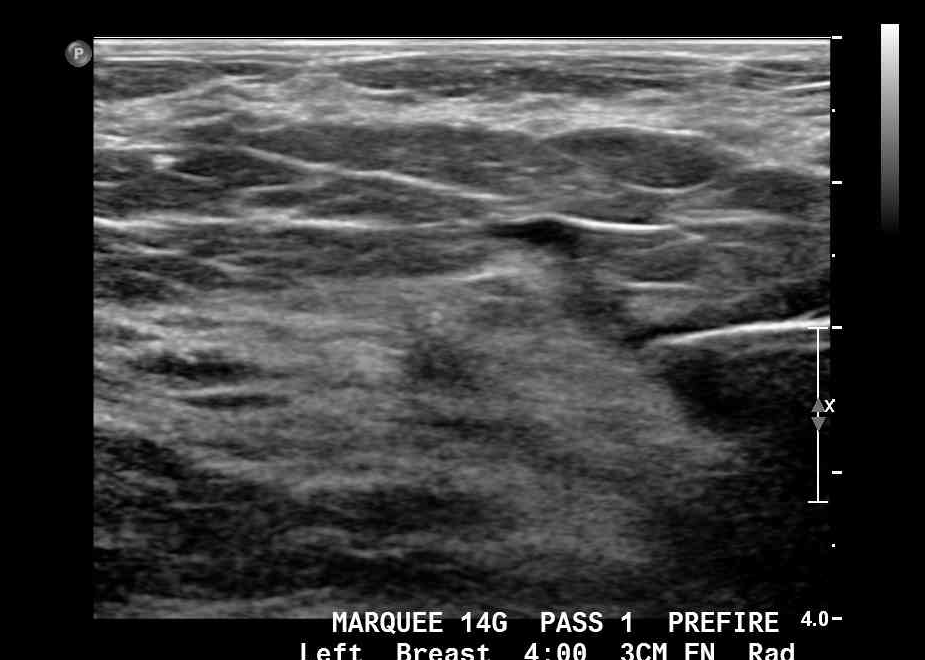

result:  True


In [3]:
img = Image.open('sample_data/image_3.png').convert("RGB")
display(img)
print("result: ", is_scan_grayscale(img))

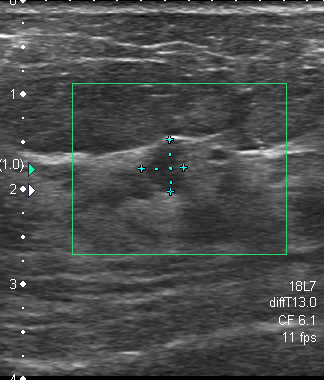

result:  False


In [4]:
img = Image.open('sample_data/image_1.png').convert("RGB")
display(img)
print("result: ", is_scan_grayscale(img))

## is_not_B_mode()

Identifies if an image is not B-mode. Non-B-mode images include doppler and elastography scans which are indicated with blood flow highlighting and full or partial regions of interest (ROI) boxes.

### Return Values and Paramters
Returns 1 if the image is a non-B-mode image and 0 otherwise.

Takes an image and a boolean "show_thresh". If "show_thresh" is True, you can see the detection process and also return an array with the first index containing the 1/0 and the second index containing the reason why it was a 1 or 0
* [0, 'gray']: The image is classified as B-mode because it is grayscale
* [1, 'box']: The image is classified as non-B-mode because it has a box forming a significant area
* [1, 'cut off box']: The image is classified as non-B-mode because it has a significant line indicating that a box that is cut off
* [1, 'color']: The image is classified as non-B-mode because it contains a significant amount of color
* [0, 'nothing']: The image is classified as B-mode because it hasn't met any of the indicators of being non-B-mode

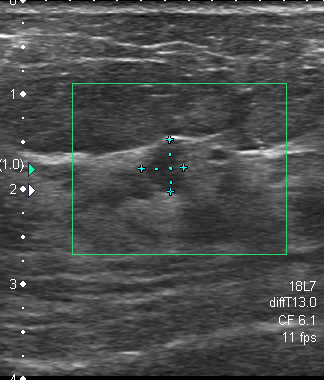

result:  1


In [5]:
img = Image.open('sample_data/image_1.png').convert("RGB")
display(img)
print("result: ", is_not_B_mode(img, False))

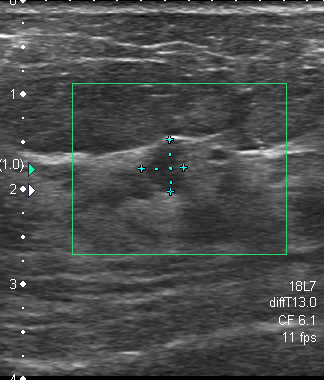

dilated color threshold:


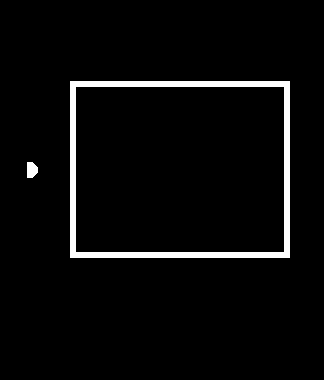

points forming significant area:


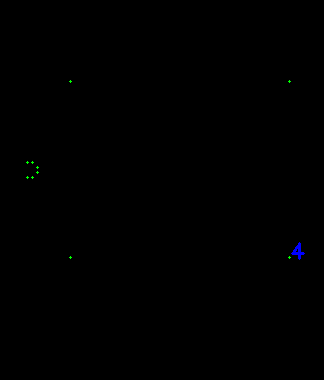

result:  [1, 'box']


In [6]:
img = Image.open('sample_data/image_1.png').convert("RGB")
display(img)
print("result: ", is_not_B_mode(img, True))

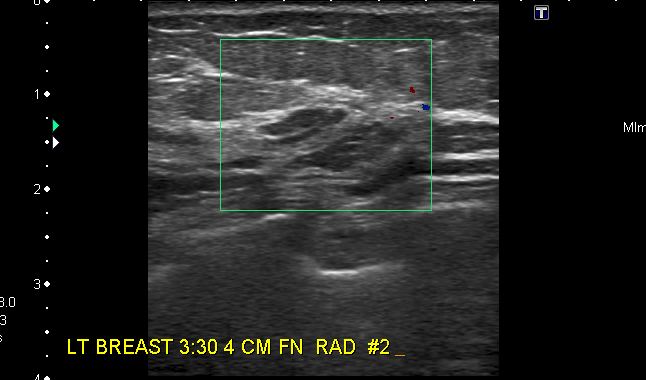

dilated color threshold:


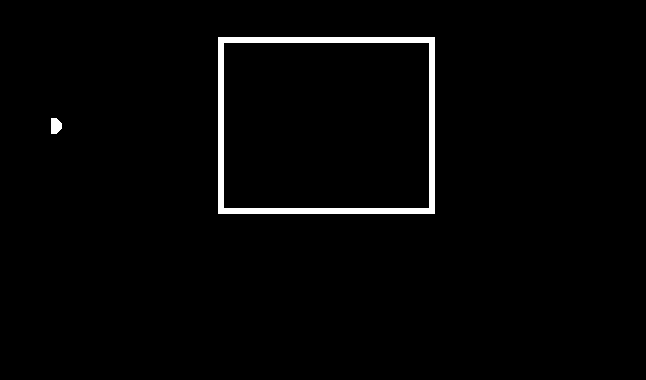

points forming significant area:


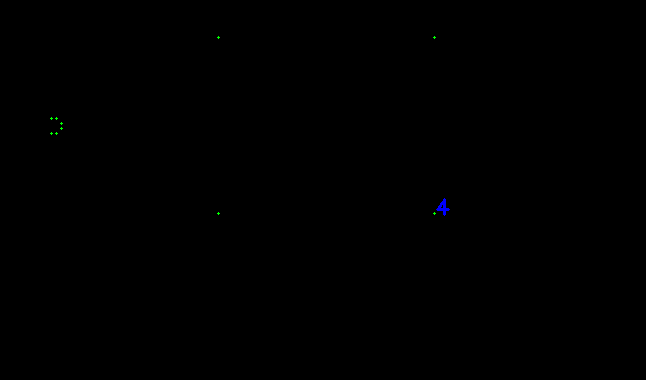

result:  [1, 'box']


In [7]:
img = Image.open('sample_data/image_2.png').convert("RGB")
display(img)
print("result: ", is_not_B_mode(img, True))

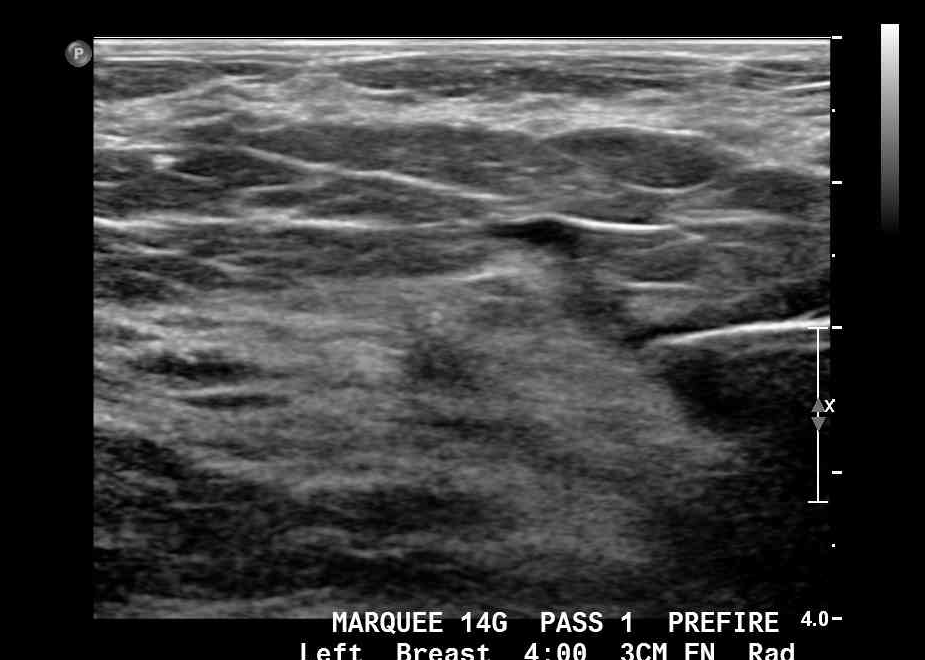

result:  [0, 'gray']


In [8]:
img = Image.open('sample_data/image_3.png').convert("RGB")
display(img)
print("result: ", is_not_B_mode(img, True))

## B_mode_wrapper()

Uses is_not_B_mode() as a helper function, and takes scans with 2 views into account. If at least one of the views is non-B-mode, the whole scan is classified as such. The return values and parameters are the same as is_not_B_mode().

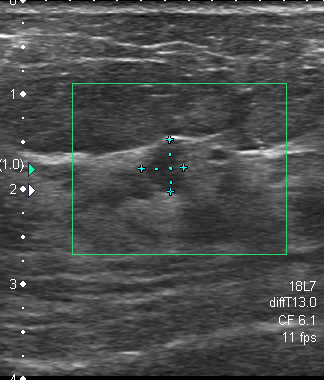

result:  1


In [9]:
img = Image.open('sample_data/image_1.png').convert("RGB")
display(img)
print("result: ", B_mode_wrapper(img, False))

## enhance_image() and detect_anno()

enhance_image() preprocesses an image for detecting lesion annotations/markers/calipers, taking in and returning an enhanced image. If "show_thresh" is True, you will see the process of the image being changed.

detect_anno() is meant to be run on the cleaned image from enhance_image() and returns a list of coordinates for the bounding boxes of any lesion annotations/markers/calipers. If "show_thresh" is True, you will see the image with bounding boxes around the identified markers.

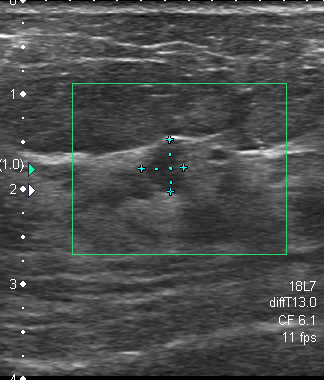

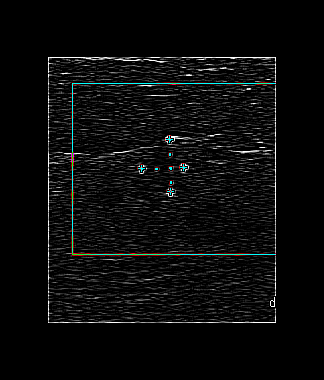

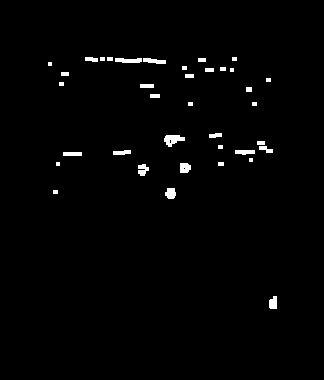

In [13]:
img = Image.open('sample_data/image_1.png').convert("RGB")
display(img)
new_img = enhance_image(img, True)

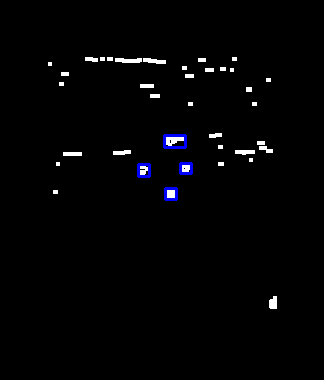

results:  [[(165, 188), (176, 188), (176, 199), (165, 199)], [(138, 164), (149, 164), (149, 176), (138, 176)], [(180, 163), (191, 163), (191, 173), (180, 173)], [(164, 135), (185, 135), (185, 147), (164, 147)]]


In [15]:
results = detect_anno(new_img, True)
print("results: ", results)

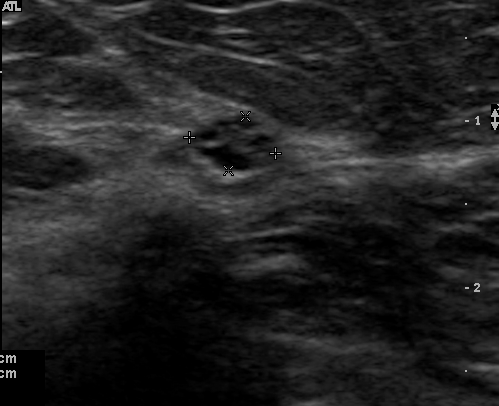

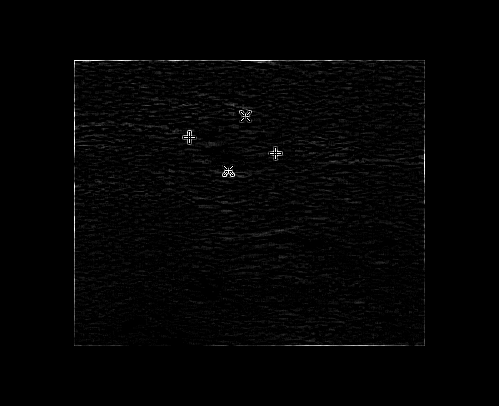

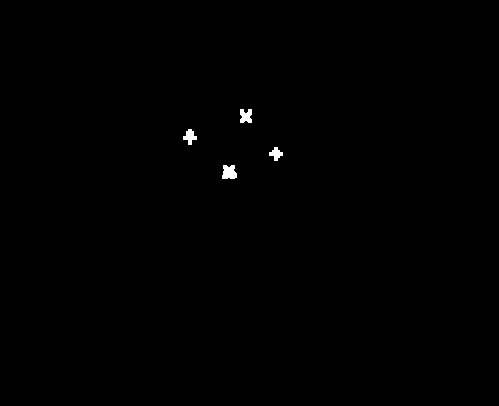

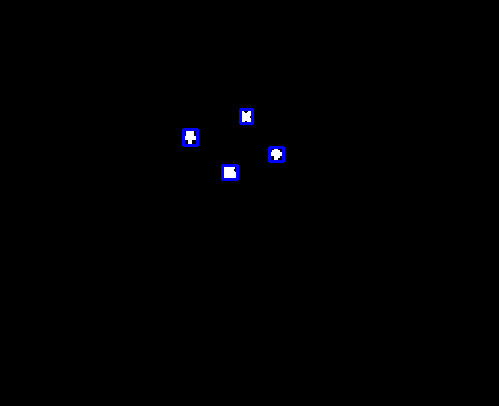

results:  [[(222, 165), (237, 165), (237, 179), (222, 179)], [(269, 147), (283, 147), (283, 161), (269, 161)], [(183, 129), (197, 129), (197, 145), (183, 145)], [(240, 109), (252, 109), (252, 123), (240, 123)]]


In [21]:
img = Image.open('sample_data/image_4.png').convert("RGB")
display(img)
new_img = enhance_image(img, True)
results = detect_anno(new_img, True)
print("results: ", results)

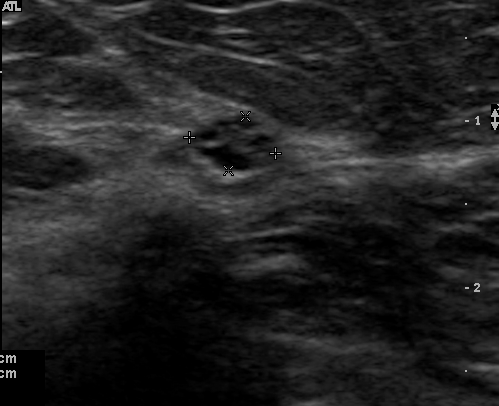

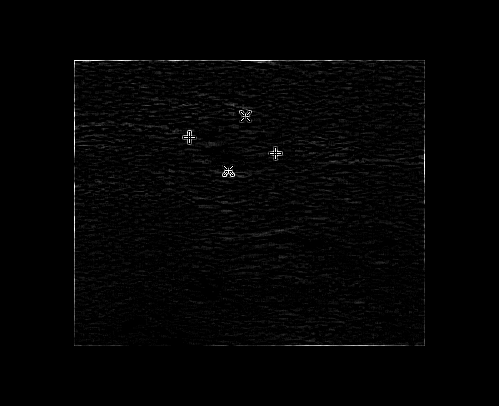

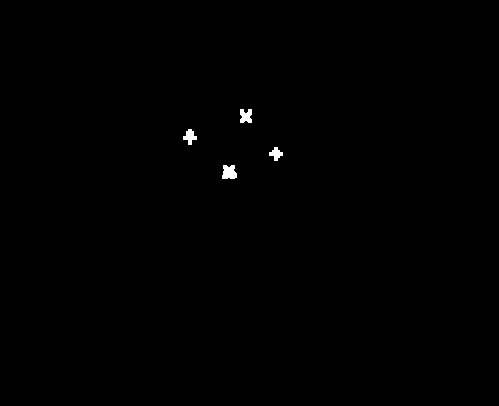

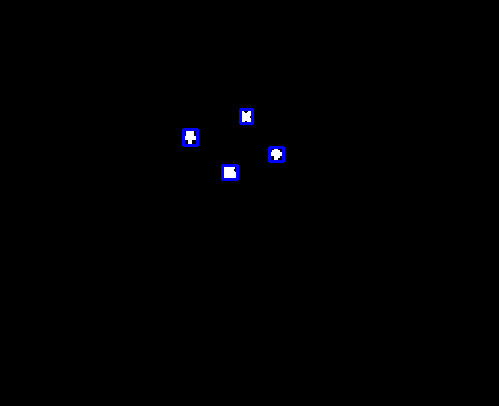

results:  [[(222, 165), (237, 165), (237, 179), (222, 179)], [(269, 147), (283, 147), (283, 161), (269, 161)], [(183, 129), (197, 129), (197, 145), (183, 145)], [(240, 109), (252, 109), (252, 123), (240, 123)]]


In [24]:
img = Image.open('sample_data/image_4.png').convert("RGB")
display(img)
new_img = enhance_image(img, True)
results = detect_anno(new_img, True)
print("results: ", results)

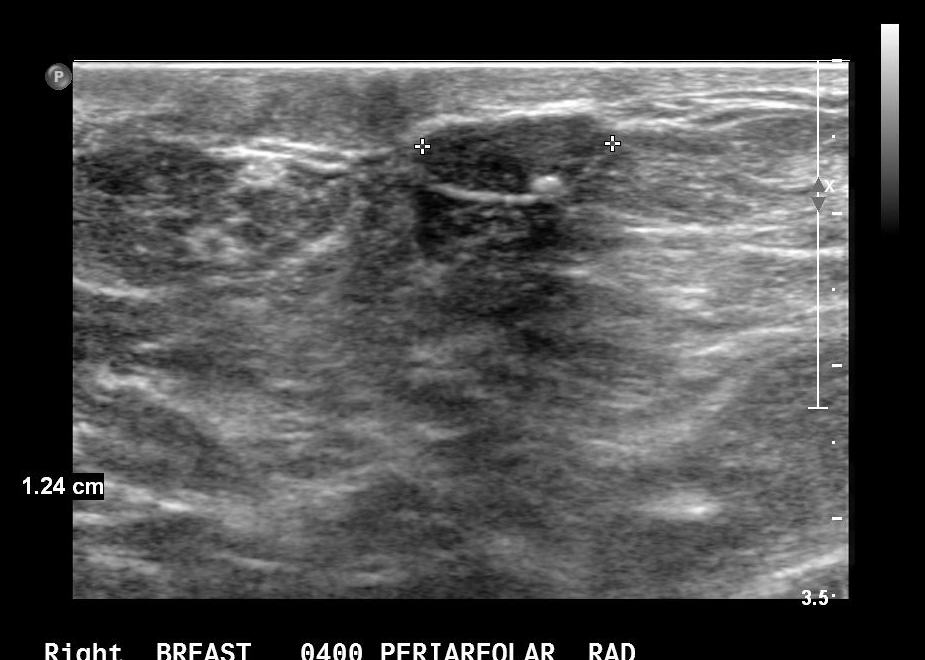

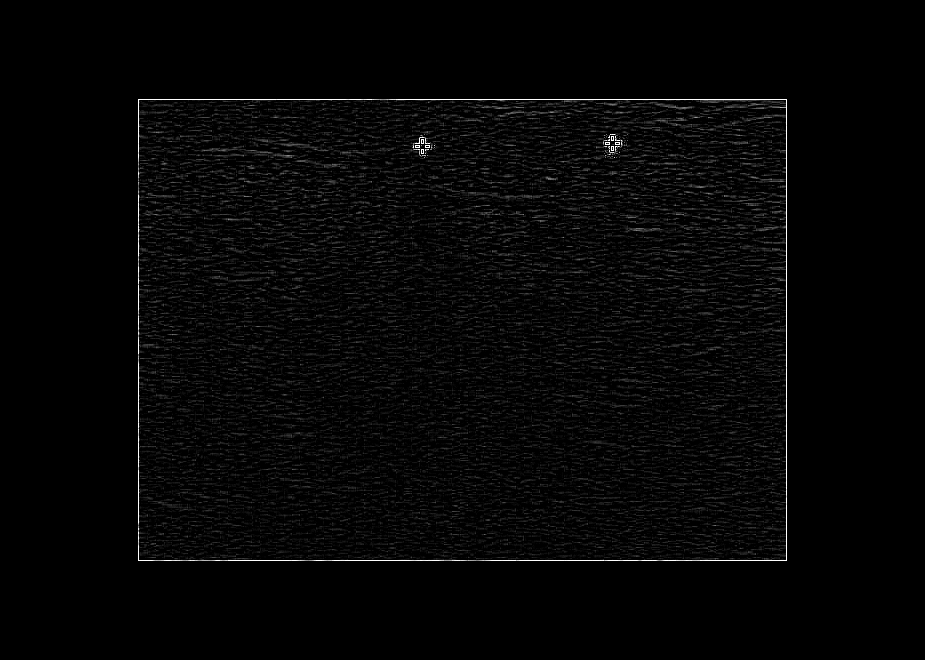

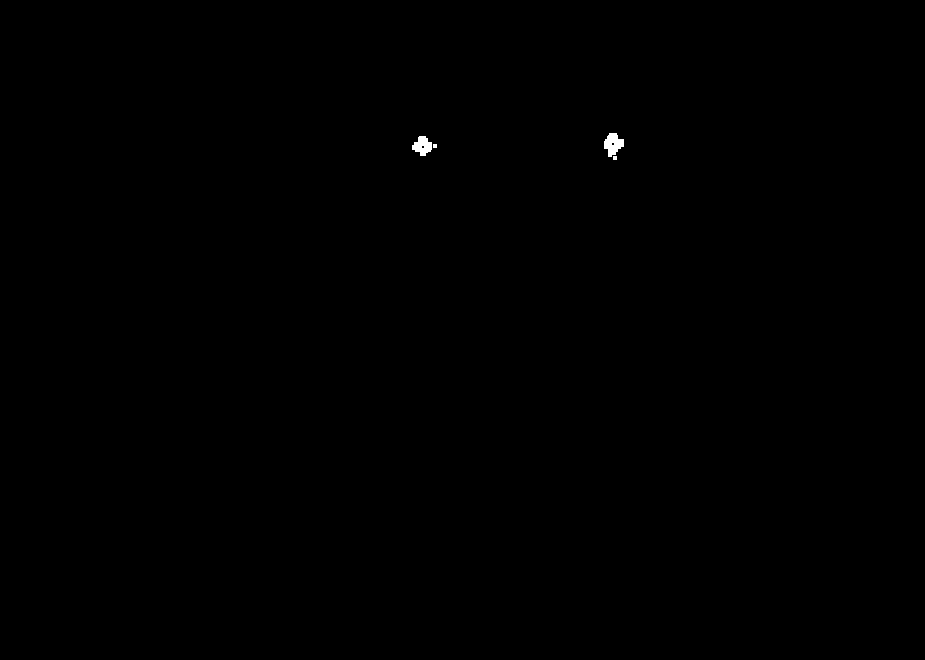

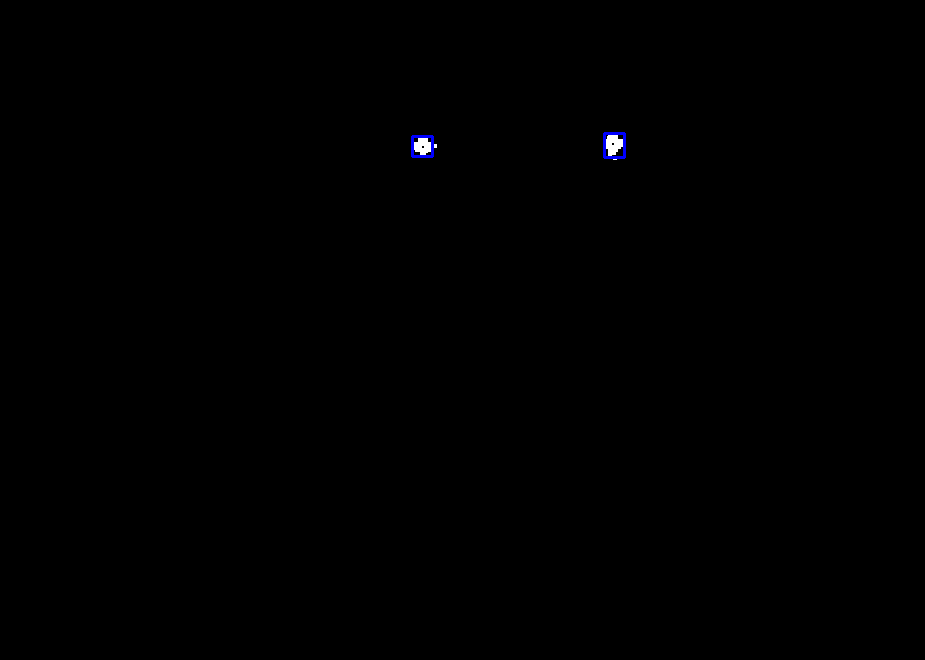

results:  [[(412, 136), (432, 136), (432, 156), (412, 156)], [(604, 133), (624, 133), (624, 157), (604, 157)]]


In [25]:
img = Image.open('sample_data/image_5.png').convert("RGB")
display(img)
new_img = enhance_image(img, True)
results = detect_anno(new_img, True)
print("results: ", results)

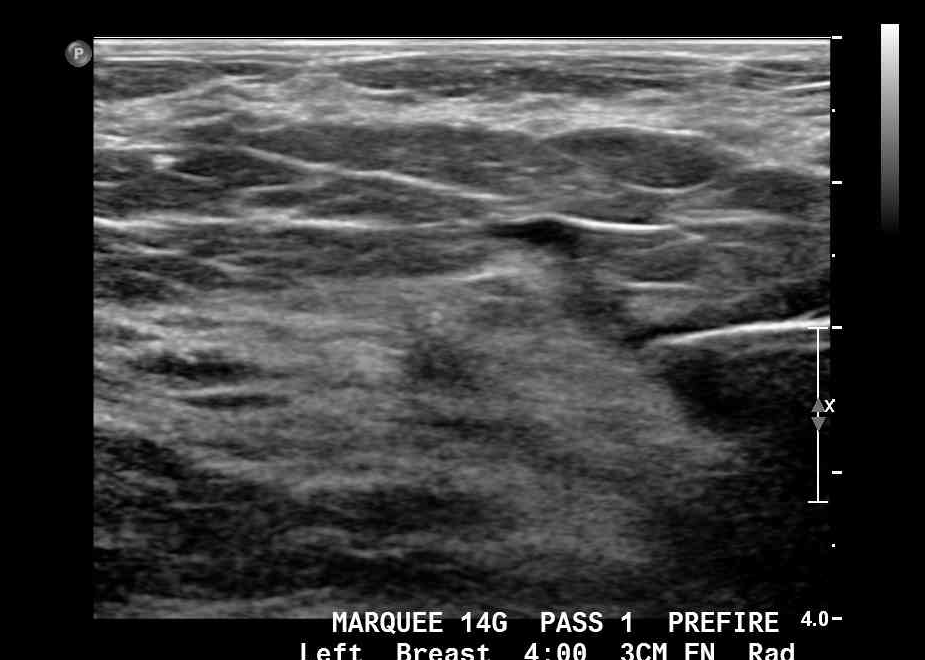

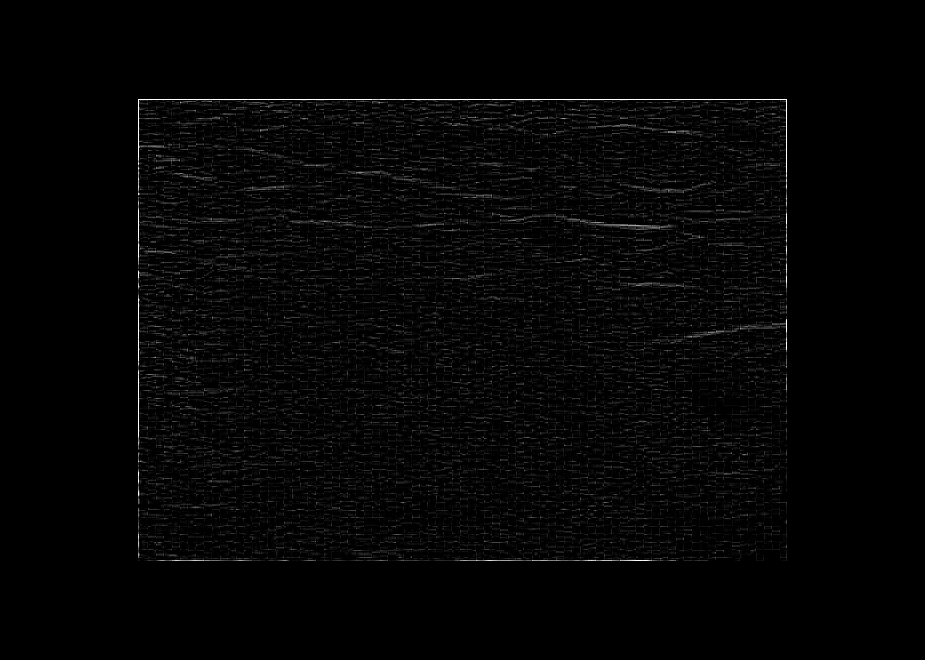

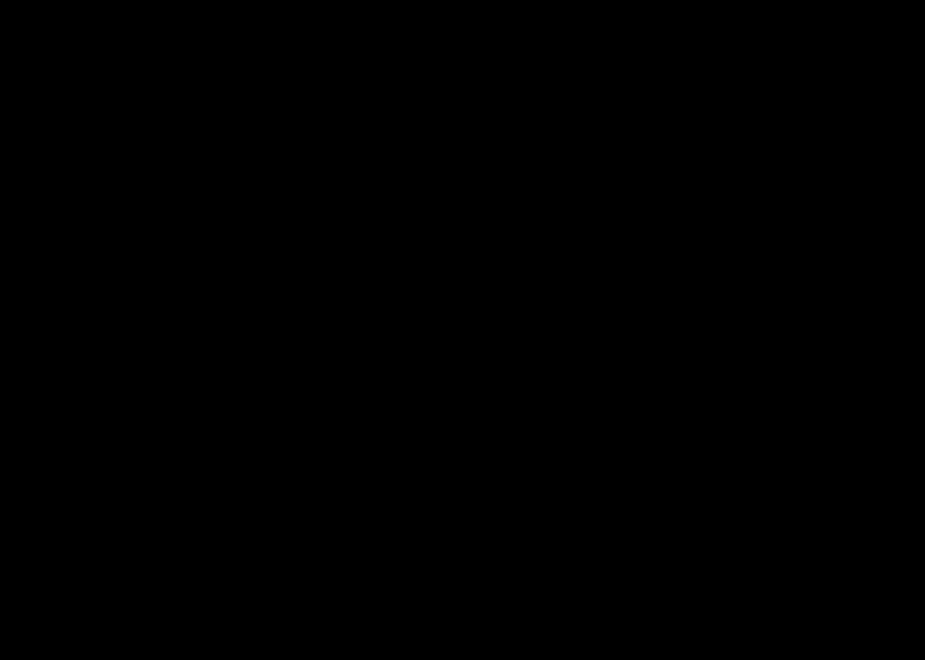

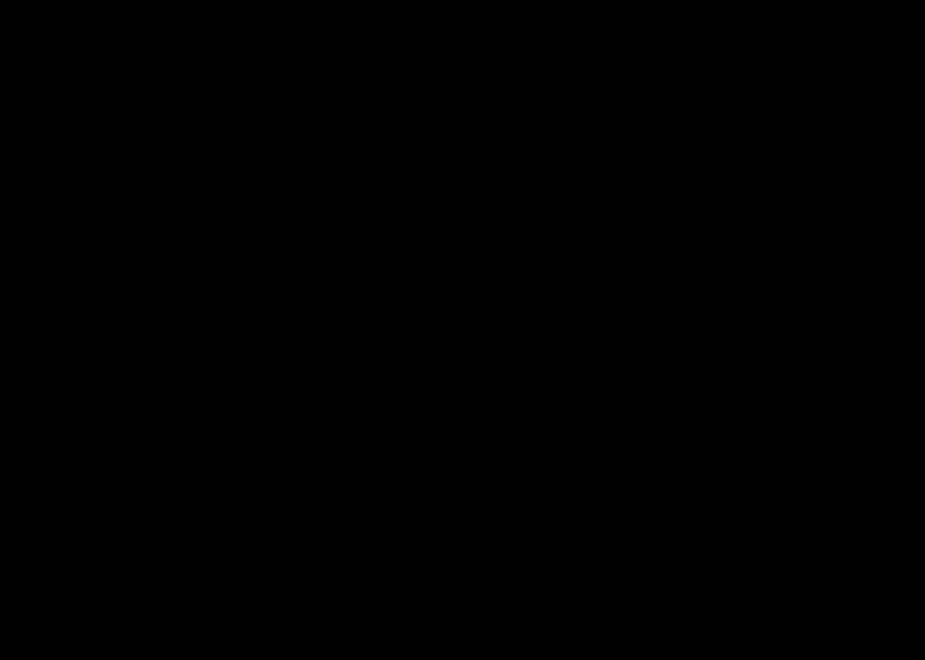

results:  []


In [26]:
img = Image.open('sample_data/image_3.png').convert("RGB")
display(img)
new_img = enhance_image(img, True)
results = detect_anno(new_img, True)
print("results: ", results)